In [1]:
%cd ../..

/home/shpotes/Courses/EAFIT/experimental/modelacion-experimental


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from src import DiscreteModel
from src.identification.non_parametric.correlation import (
    identify_weighting_sequence,
    compute_theoretical_weighting_func,
    simulate_from_seq,
)

In [3]:
def punto_5(model, time, num_points=500, input_type='prbs'):
    # i
    t, g = compute_theoretical_weighting_func(model, time)
    plt.plot(t, g, '-o', label='theoretical')
    t, estim = identify_weighting_sequence(model, num_points, input_type)
    plt.plot(t[:20], estim[:20], '-o', label='experimental') 
    plt.legend()
    plt.show()

    return estim

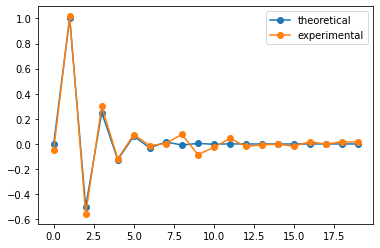

In [4]:
model = DiscreteModel([1], [1, 0.5])
estim = punto_5(model, time=np.arange(20), input_type='gaussian')

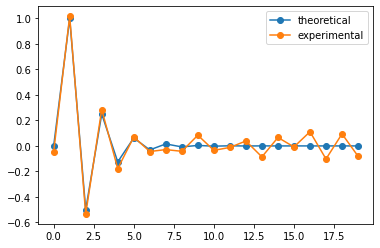

In [5]:
model = DiscreteModel([1], [1, 0.5])
estim = punto_5(model, time=np.arange(20), input_type='prbs')

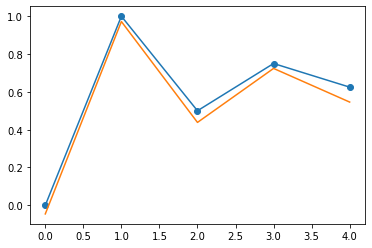

In [6]:
t, (step, ) = signal.dstep(model.system, t=np.arange(5))
plt.plot(t, step, '-o', label='step')
weight_response = simulate_from_seq(estim, np.ones_like(estim))[:5]
plt.plot(t, weight_response)